# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# **Exploratory Data Analysis**

In [2]:
db = pd.read_csv("/content/Salary.csv")
db.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
db.tail()

,YearsExperience,Salary
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [4]:
db.shape

(35, 2)

In [5]:
db.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [6]:
db.nunique()

YearsExperience    33
Salary             35
dtype: int64

In [7]:
db['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5, 11.2, 11.5, 12.3, 12.9, 13.5])

In [8]:
db['Salary'].unique()

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465])

In [9]:
db.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

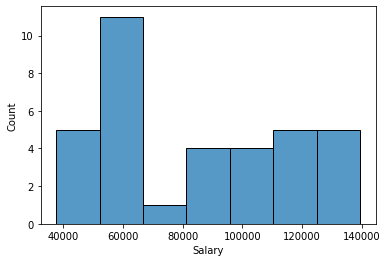

In [10]:
sns.histplot(db['Salary'])

In [11]:
correlation = db.corr()

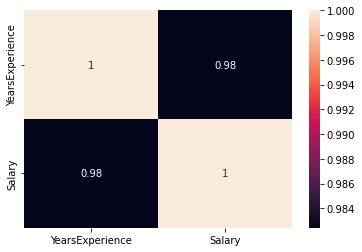

In [12]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

# **Machine Learning**

***Set X axis and Y axis data***

In [13]:
x = db['YearsExperience'].values
y = db['Salary'].values

***Data extraction & Shaping***

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2, random_state = 21)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
x_train

array([[ 1.1],
       [ 9. ],
       [ 6.8],
       [ 9.6],
       [ 4.1],
       [ 9.5],
       [ 2.9],
       [ 7.1],
       [10.5],
       [ 7.9],
       [ 3. ],
       [12.3],
       [ 8.2],
       [11.2],
       [13.5],
       [ 4. ],
       [ 4.5],
       [ 3.2],
       [ 3.9],
       [ 5.3],
       [ 1.5],
       [ 2. ],
       [ 8.7],
       [11.5],
       [ 5.1],
       [ 2.2],
       [ 4.9],
       [ 3.7]])

***Linear Regresson Model***

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

***Predict the output by the regression model***

In [16]:
y_predict = model.predict(x_test.reshape(-1, 1))

***Model Accuracy***

In [17]:
train_occuracy = model.score(x_train, y_train) 
train_occuracy

0.9674323193516465

In [18]:
test_occuracy = model.score(x_test, y_test) 
test_occuracy

0.9557118926776748

***Prediction of salary based on length of experiences***

In [19]:
new_data = np.array([9]).reshape(-1, 1)
new_data[0][0]

9

In [20]:
print(model.predict(new_data)[0])

107447.38598584154


# **Visual Prediction**

Text(0.5, 1.0, 'Experience Years VS Salary')

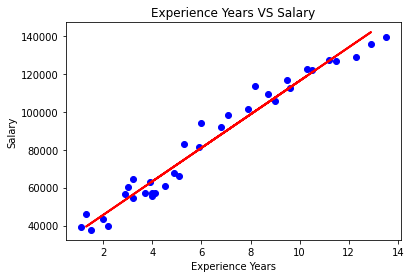

In [21]:
%matplotlib inline
plot.scatter(x,y, color = "blue")
plot.plot(x_test, y_predict, color='red', linewidth=2)
plot.xlabel('Experience Years')
plot.ylabel('Salary')
plot.title('Experience Years VS Salary')

# **Visualize Prediction VS Actual**

Text(0.5, 1.0, 'Experience Years VS Salary')

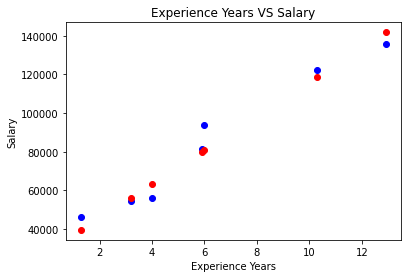

In [22]:
%matplotlib inline
plot.scatter(x_test,y_test, color = "blue")
plot.scatter(x_test,y_predict, color = "red")
plot.xlabel('Experience Years')
plot.ylabel('Salary')
plot.title('Experience Years VS Salary')